# Modèle from scratch : classification binaire COVID / SAIN (NORMAL)

In [1]:
# Chargement des modules nécessaires:

import os

import random

import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [2]:
# On declare les chemins vers les données :

Image = 'Data'
        
train_data_dir = 'Data/TRAIN'
validation_data_dir = 'Data/VALIDATION'
test_data_dir = 'Data/TEST'

# Dimensions et path :
img_width, img_height = 224, 224

ImageTRAINCOVID = os.listdir(Image + '/TRAIN/COVID19')
ImageTRAINNORMAL = os.listdir(Image + '/TRAIN/NORMAL')

ImageVALIDATIONCOVID = os.listdir(Image + '/VALIDATION/COVID19')
ImageVALIDATIONNORMAL = os.listdir(Image + '/VALIDATION/NORMAL')

ImageTESTCOVID = os.listdir(Image + '/TEST/COVID19')
ImageTESTNORMAL = os.listdir(Image + '/TEST/NORMAL')

print('Il y a ' + str(len(ImageTRAINCOVID)) + ' images d\'entrainement de patients covid.') 
print('Il y a ' + str(len(ImageTRAINNORMAL)) + ' images d\'entrainement de patients non-covid.') 
print('Il y a ' + str(len(ImageVALIDATIONCOVID)) + ' images de validation de patients covid.') 
print('Il y a ' + str(len(ImageVALIDATIONNORMAL)) + ' images de validation de patients non-covid.') 
print('Il y a ' + str(len(ImageTESTCOVID)) + ' images test de patients covid.') 
print('Il y a ' + str(len(ImageTESTNORMAL)) + ' images test de patients non-covid.') 

Il y a 460 images d'entrainement de patient covid.
Il y a 1266 images d'entrainement de patient non-covid.
Il y a 116 images de validation de patient covid.
Il y a 317 images de validation de patient non-covid.
Il y a 219 images test de patient covid.
Il y a 1341 images test de patient non-covid.


TRAIN COVID


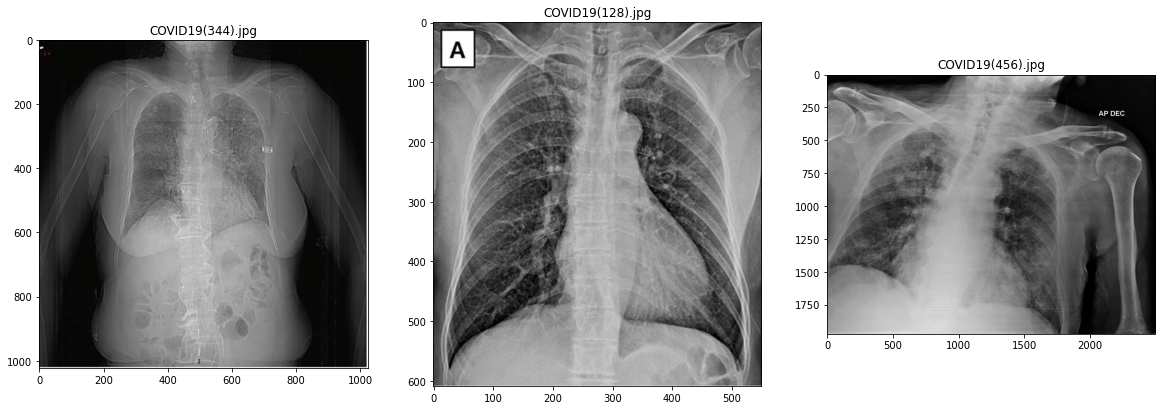

VALIDATION COVID


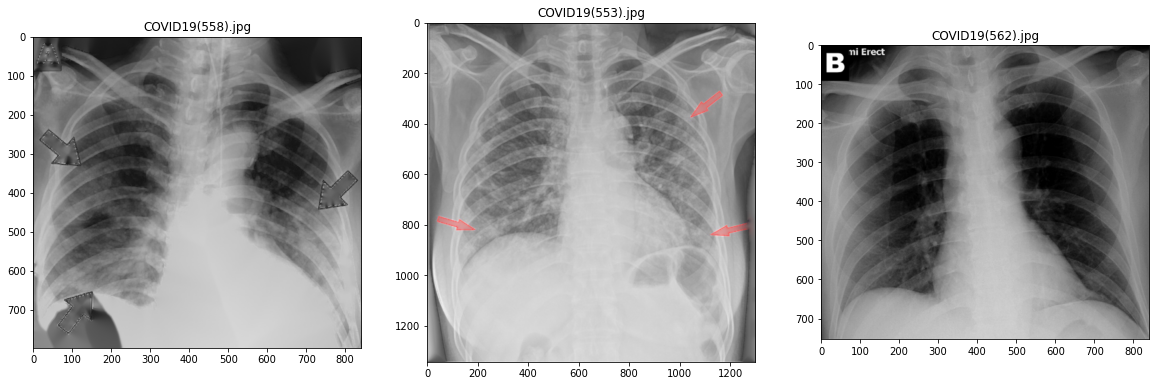

TRAIN NORMAL


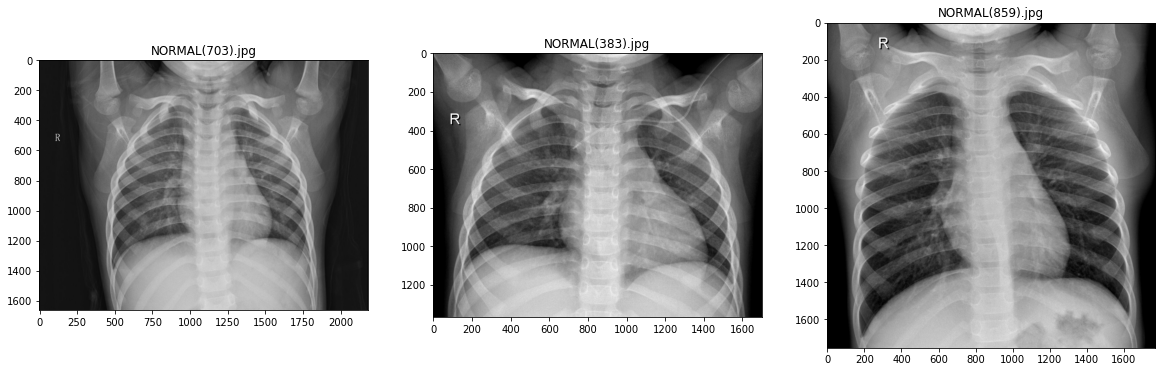

VALIDATION NORMAL


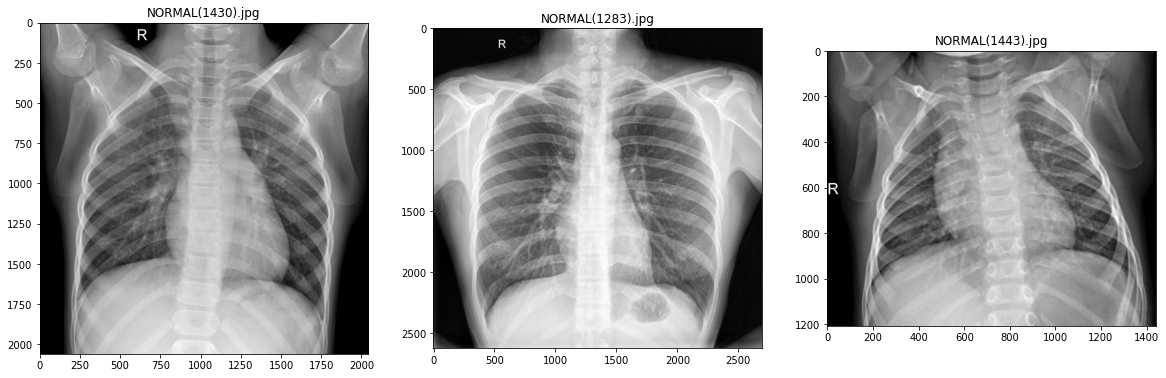

In [3]:
# Visualisation de 6 exemples en 2 lignes et 3 colonnes pour chaque classe :

# TRAIN :

print("TRAIN COVID")


# COVID  :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINCOVID = random.choice(os.listdir(train_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/COVID19',randomImageTRAINCOVID)), cmap='gray')
    plt.title(randomImageTRAINCOVID)
    
plt.show()

print("VALIDATION COVID")
# COVID  :
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTCOVID = random.choice(os.listdir(validation_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join( validation_data_dir +'/COVID19',randomImageTESTCOVID)), cmap='gray')
    plt.title(randomImageTESTCOVID)
    
plt.show()

print("TRAIN NORMAL")
# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINNORMAL = random.choice(os.listdir(train_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/NORMAL',randomImageTRAINNORMAL)), cmap='gray')
    plt.title(randomImageTRAINNORMAL)
    
plt.show()


# TEST:

print("VALIDATION NORMAL")

# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTNORMAL = random.choice(os.listdir(validation_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join( validation_data_dir +'/NORMAL',randomImageTESTNORMAL)), cmap='gray')
    plt.title(randomImageTESTNORMAL)
    
plt.show()

In [4]:
# Preprocessing :

# On rescale les images :

datagen = ImageDataGenerator(rescale=1./255)

# On définit la batch size :

batch_size = 32 

# On prépare les tableaux de données depuis les images :

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 1726 images belonging to 2 classes.
Found 433 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.


In [5]:
# On définit l'architecture du modèle :

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# On compile le modeles :

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# On affiche le model :

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [6]:
# On définit les parametres pour l'entrainement :
epochs = 100
train_samples = 1726
validation_samples = 433
test_samples = 1560

# On définit les callbacks : 
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience = 10,restore_best_weights=True,),
]

In [7]:
# Entrainement du modèle :

historique = model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        callbacks = my_callbacks,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size)

/Users/chourouk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
53/53 [==============================] - 696s 13s/step - loss: 0.8291 - accuracy: 0.7694 - val_loss: 0.1195 - val_accuracy: 0.9615
Epoch 2/100
53/53 [==============================] - 603s 11s/step - loss: 0.3416 - accuracy: 0.9140 - val_loss: 0.0949 - val_accuracy: 0.9832
Epoch 3/100
53/53 [==============================] - 648s 12s/step - loss: 0.1844 - accuracy: 0.9268 - val_loss: 0.0902 - val_accuracy: 0.9688
Epoch 4/100
53/53 [==============================] - 518s 10s/step - loss: 0.1093 - accuracy: 0.9585 - val_loss: 0.1390 - val_accuracy: 0.9543
Epoch 5/100
53/53 [==============================] - 439s 8s/step - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.0719 - val_accuracy: 0.9736
Epoch 6/100
53/53 [==============================] - 267s 5s/step - loss: 0.1210 - accuracy: 0.9662 - val_loss: 0.0494 - val_accuracy: 0.9808
Epoch 7/100
53/53 [==============================] - 142s 3s/step - loss: 0.0785 - accuracy: 0.9790 - val_loss: 0.0463 - val_accuracy: 0.9856
Ep

In [10]:
n_epochs = len(historique.history['loss'])
GenOptimale = n_epochs-10
print("la generation optimale est : ",GenOptimale)
model.save_weights('models/Weights/scratch_224_224_'+str(GenOptimale)+'.h5')

la generation optimale est :  29


In [11]:
def testImage(path):
    img = load_img(path, target_size=(224,224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    y = model.predict(img)
    return y[0][0]

In [16]:
# On évalue le modèle sur les données de validation :

resultValidation = model.evaluate_generator(validation_generator, validation_samples)

# On évalue le modèle sur les données de test :

resultTest = model.evaluate_generator(test_generator, test_samples)




In [18]:
# On test quelque image aléatoirement choisis :

trueCovidDiagnostic = 0
trueNormalDiagnostic = 0
falseCovidDiagnostic = 0
falseNormalDiagnostic = 0

for i in range(100):
    if random.randint(1,2) == 1:
        index = random.randint(0,len(ImageTESTCOVID))
        result = testImage("Data/TEST/COVID19/"+ImageTESTCOVID[index])
        if result == 0:
            trueCovidDiagnostic = trueCovidDiagnostic+1
        else:
            falseNormalDiagnostic = falseNormalDiagnostic+1
    else:
        index = random.randint(0,len(ImageTESTNORMAL))
        result = testImage("Data/TEST/NORMAL/"+ImageTESTNORMAL[index])
        if result == 1:
            trueNormalDiagnostic = trueNormalDiagnostic+1
        else:
            falseCovidDiagnostic = falseCovidDiagnostic+1
            
trueDiagnostic = trueCovidDiagnostic + trueNormalDiagnostic

print("Résultat de l'évaluation sur le dataset de Validation ")
print(resultValidation)
print(resultTest)

print('on a testé aleatoirement 100 images du set de test.')
print('taux de succés général :',trueDiagnostic)
print('taux de diagnostic Covid correct:',trueCovidDiagnostic)
print('taux de diagnostic Normal correct:',trueNormalDiagnostic)
print('taux de faux positifs :',falseCovidDiagnostic)
print('taux de faux négatifs :',falseNormalDiagnostic)


Résultat de l'évaluation sur le dataset de Validation 
[0.01243769470602274, 0.9930716156959534]
[0.1376076340675354, 0.9910256266593933]
on a testé aleatoirement 100 images du set de test.
taux de succés général : 99
taux de diagnostic Covid correct: 54
taux de diagnostic Normal correct: 45
taux de faux positifs : 1
taux de faux négatifs : 0


###### On enregistre l'historique et les poids :

In [ ]:

model.save_weights('models/scratch_10G_224_224.h5')

np.save('models/historique_scratch_224_224_10G_Baudouin.npy',historique.history)

model.save('models/scratchFull_10G_224_224')

In [ ]:
# On instancie notre objet ImageDataGenerator

MonPetitGenerateur = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest", cval=125)

In [ ]:
# On stocke les images que l'on veut augmenter:

image_directory = 'Data/TO-AUGMENTED/COVID/'
image_directory2 = 'Data/TO-AUGMENTED/NORMAL/'
SIZE = 500
datasetCovid = []
datasetNormal = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = load_img(image_directory + image_name,target_size = (224,224))
        image = img_to_array(image)
        image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
        datasetCovid.append(image)
x = np.array(datasetCovid)

my_images2 = os.listdir(image_directory2)
for i, image_name in enumerate(my_images2):
    if (image_name.split('.')[1] == 'jpg'):
        image2 = load_img(image_directory2 + image_name,target_size = (224,224))
        image2 = img_to_array(image2)
        image2 = image2.reshape((image2.shape[0], image2.shape[1], image2.shape[2]))
        datasetNormal.append(image2)
y = np.array(datasetNormal)


In [ ]:
# On augmente et on stocke les nouvelles images :

i = 0
for batch in MonPetitGenerateur.flow(x, batch_size=32,  
                          save_to_dir='Data/AUGMENTED/COVID-AUGMENTED', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 19:
        break

In [ ]:
i = 0
for batch in MonPetitGenerateur.flow(y, batch_size=32,  
                          save_to_dir='Data/AUGMENTED/NORMAL-AUGMENTED', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 19:
        break

In [ ]:
# On declare les chemins vers les nouvelles données :
Image = 'data'
train_data_dir = 'Data/AUGMENTED'
validation_data_dir = 'Data/TEST'

# On déclare les dimensions pour les images (224,224) :

img_width, img_height = 224, 224

# On liste et stocke les chemins des images :

ImageTRAINCOVID = os.listdir(Image + '/AUGMENTED/COVID-AUGMENTED')
ImageTRAINNORMAL = os.listdir(Image + '/AUGMENTED/NORMAL-AUGMENTED')

ImageTESTCOVID = os.listdir(Image + '/TEST/COVID19')
ImageTESTNORMAL = os.listdir(Image + '/TEST/NORMAL')

# On affiche le nombre d'images trouvées :

print('Il y a ' + str(len(ImageTRAINCOVID)) + ' images d\'entrainement de patient covid.') 
print('Il y a ' + str(len(ImageTRAINNORMAL)) + ' images d\'entrainement de patient non-covid.') 
print('Il y a ' + str(len(ImageTESTCOVID)) + ' images test de patient covid.') 
print('Il y a ' + str(len(ImageTESTNORMAL)) + ' images test de patient non-covid.') 


In [ ]:
# On rescale les images :

datagen = ImageDataGenerator(rescale=1./255)

# On définit la batch size :

batch_size = 32 

# On prépare les tableaux de données depuis les images :

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')



In [ ]:
# On Re-definit les paramètres pour l'entrainement :

epochs = 4
train_samples = 160
validation_samples = 1200
test_samples = 1200

In [ ]:
# Re-Entrainement du modèle :

model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size)

In [ ]:
# On évalue le modèle sur les données de validation :

resultValidation = model.evaluate_generator(validation_generator, validation_samples)

# On évalue le modèle sur les données de test :

resultTest = model.evaluate_generator(test_generator, test_samples)

resultExemple = testImage("Data/EXEMPLE/COVID1")

# Visualisation de l'image puis test puis affichage du résultat :
    
print(resultValidation)
print(resultTest)
print(resultExemple)

In [19]:
# On enregistre l'historique et les poids :

np.save('models/historique_scratch_224_224_'+str(GenOptimale)+'.npy',historique.history)